<a href="https://colab.research.google.com/github/vigneshsharma1997/Assignments/blob/main/KNN_Neighbours_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
url = 'https://raw.githubusercontent.com/vivek2319/K-Nearest-Neighbors/master/Datasets/Classified%20Data'

In [1]:
# Load the necessary python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [3]:
df = pd.read_csv(url)

In [5]:
df.head()

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features=scaler.fit_transform(df.drop('TARGET CLASS',axis=1))


In [11]:
df_feat = pd.DataFrame(scaled_features,columns = df.columns[:-1])
df_feat.head()

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-1.730320,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.726856,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-1.723391,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,-1.719927,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,-1.716463,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [12]:
#Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['TARGET CLASS'] , test_size=0.30)

In [13]:
from sklearn.neighbors import KNeighborsClassifier

In [14]:
kn  = KNeighborsClassifier(n_neighbors=1)

In [16]:
kn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [20]:
KNeighborsClassifier(algorithm='auto' , leaf_size =30 , metric ='minkowski' , metric_params=None , n_jobs=1 , n_neighbors=1,p=2 , weights='uniform')


KNeighborsClassifier(n_jobs=1, n_neighbors=1)

In [22]:
pred = kn.predict(X_test)

In [29]:
#Predicting and evaluations
from sklearn.metrics import classification_report , confusion_matrix ,accuracy_score

print(confusion_matrix(y_test,pred))

[[137   9]
 [  7 147]]


In [24]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94       146
           1       0.94      0.95      0.95       154

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



In [33]:
#Choosing a K-value
error_rate=[]
accuracy_list = []
for i in range(1,40):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,y_train)
  pred_i = knn.predict(X_test)
  accuracy_list.append(accuracy_score(y_test, pred_i))
  error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

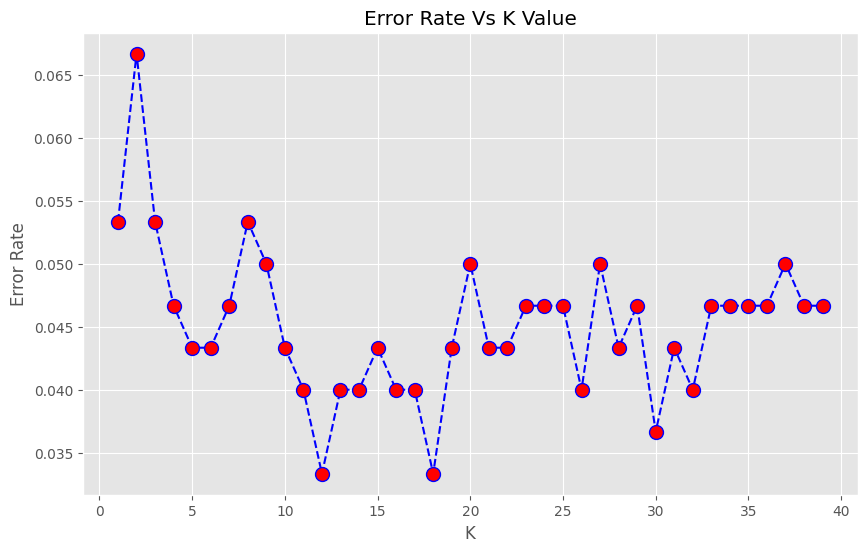

In [27]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate Vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Text(0, 0.5, 'Accuracy')

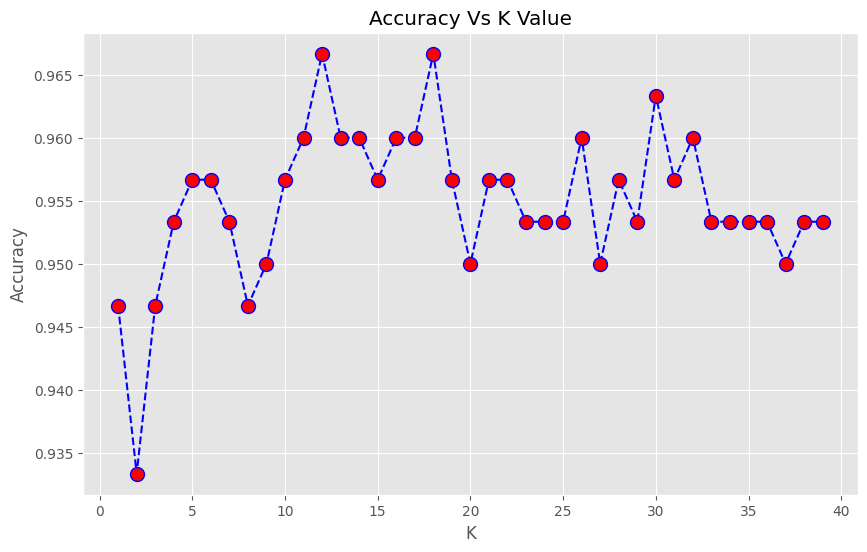

In [34]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),accuracy_list,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Accuracy Vs K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')

In [35]:
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
print('WITH K=12')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=12


[[140   6]
 [  4 150]]


              precision    recall  f1-score   support

           0       0.97      0.96      0.97       146
           1       0.96      0.97      0.97       154

    accuracy                           0.97       300
   macro avg       0.97      0.97      0.97       300
weighted avg       0.97      0.97      0.97       300



In [36]:
knn = KNeighborsClassifier(n_neighbors=18)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
print('WITH K=18')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=18


[[140   6]
 [  4 150]]


              precision    recall  f1-score   support

           0       0.97      0.96      0.97       146
           1       0.96      0.97      0.97       154

    accuracy                           0.97       300
   macro avg       0.97      0.97      0.97       300
weighted avg       0.97      0.97      0.97       300

